# fig 2h: Positive correlation between number of gamma detections by RNS System within the same 10-minute trials and HAMD-6 score

# fig 2i: Symptom severity scores in the week pre vs. post closed-loop stimulation onset (n=3, 31 for VAS134 D, n=2, 30 for HAMD6)


In [2]:

import os
import numpy as np
import pandas as pd
import scipy 
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [3]:
SRC_DATA_DIR = './source_data'
pr01_recordings_before_Aug13th = 'pr01_recordings_before_Aug13th.csv'
df = pd.read_csv(os.path.join(SRC_DATA_DIR, pr01_recordings_before_Aug13th))
df['mean (VAS-D,VAD_A)'] = (df['vas_anxiety'] + df['vas_depression'])/2
df


,date,start,end,time for scale,vas_anxiety,vas_depression,HAMD,A1,A2,A1+A2,type,mood,Mood cluster,"mean (VAS-D,VAD_A)"
0,29-Jul,11:50 AM,12:00 PM,12:02 PM,10,16,0,0,0,0,L,0,0.0,13.0
1,29-Jul,12:33 PM,12:43 PM,12:44 PM,5,3,0,3,0,3,L,0,0.0,4.0
2,29-Jul,12:45 PM,12:55 PM,12:55 PM,6,5,0,2,0,2,L,0,0.0,5.5
3,29-Jul,12:58 PM,1:08 PM,1:09 PM,6,5,0,0,1,1,L,0,0.0,5.5
4,29-Jul,1:12 PM,1:22 PM,1:22 PM,4,7,0,2,1,3,L,0,0.0,5.5
5,29-Jul,2:40 PM,2:50 PM,2:54 PM,23,61,10,5,5,10,L,1,1.0,42.0
6,29-Jul,2:55 PM,3:05 PM,3:13 PM,20,32,8,6,5,11,L,gray,0.5,26.0
7,29-Jul,3:15 PM,3:25 PM,3:25 PM,37,45,11,12,2,14,L,1,1.0,41.0
8,29-Jul,3:28 PM,3:38 PM,3:39 PM,39,59,15,7,3,10,L,1,1.0,49.0
9,30-Jul,11:18 AM,11:28 AM,11:29 AM,15,21,6,0,0,0,L,0,0.0,18.0


### figure 2i

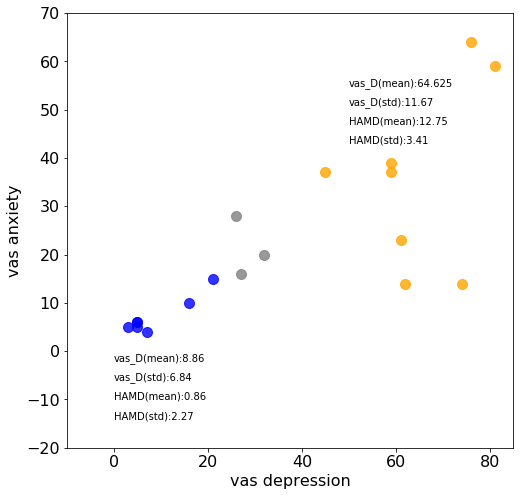

In [5]:
df_low = df[ df['mood'] == '0']
mean_vas_D_low = df_low['vas_depression'].mean()
std_vas_D_low = df_low['vas_depression'].std()
mean_HAMD_low = df_low['HAMD'].mean()
std_HAMD_low = df_low['HAMD'].std()

df_high = df[ df['mood'] == '1']
mean_vas_D_high = df_high['vas_depression'].mean()
std_vas_D_high = df_high['vas_depression'].std()
mean_HAMD_high = df_high['HAMD'].mean()
std_HAMD_high = df_high['HAMD'].std()


df_gray = df[ df['mood'] == 'gray']



fig = plt.figure(figsize=(8,8))
plt.scatter(df_low['vas_depression'],df_low['vas_anxiety'] , color='blue' ,s =100, alpha = 0.8)
plt.scatter(df_high['vas_depression'],df_high['vas_anxiety'], color='orange' , s=100, alpha = 0.8)
plt.scatter(df_gray['vas_depression'],df_gray['vas_anxiety'], color='gray' , s=100, alpha = 0.8)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('vas depression', fontsize = 16)
plt.ylabel('vas anxiety', fontsize = 16)

plt.annotate('vas_D(mean):'+str(mean_vas_D_high), xy =(50, 50), xytext =(50, 55)) 
plt.annotate('vas_D(std):'+str(round(std_vas_D_high,2)), xy =(50, 50), xytext =(50, 51)) 
plt.annotate('HAMD(mean):'+str(mean_HAMD_high), xy =(50, 50),  xytext =(50, 47)) 
plt.annotate('HAMD(std):'+str(round(std_HAMD_high,2)), xy =(50, 50), xytext =(50, 43)) 



plt.annotate('vas_D(mean):'+str(round(mean_vas_D_low,2)), xy =(0, -2), xytext =(0, -2)) 
plt.annotate('vas_D(std):'+str(round(std_vas_D_low,2)), xy =(0, -6), xytext =(0, -6)) 
plt.annotate('HAMD(mean):'+ str(round(mean_HAMD_low,2)), xy =(0, -10),  xytext =(0, -10)) 
plt.annotate('HAMD(std):'+str(round(std_HAMD_low,2)), xy =(0, -14),  xytext =(0, -14)) 

plt.ylim([-20,70])
plt.xlim([-10,85])
plt.show()


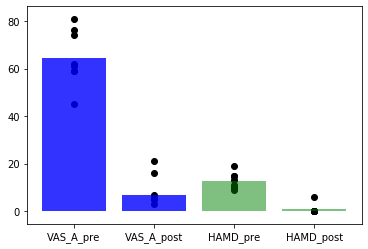

In [6]:
plt.figure()



plt.bar(1,mean_vas_D_high, color = 'blue', alpha =0.8)
plt.bar(2,std_vas_D_low, color = 'blue',  alpha =0.8)



plt.scatter(np.ones(len(df_high['vas_depression'],)),df_high['vas_depression'], color = 'black')
plt.scatter(2 *np.ones(len(df_low['vas_depression'],)),df_low['vas_depression'], color = 'black')

plt.bar(3,mean_HAMD_high, color = 'green',  alpha =0.5)
plt.bar(4,mean_HAMD_low, color = 'green',  alpha =0.5)



plt.scatter(3 * np.ones(len(df_high['HAMD'],)),df_high['HAMD'], color = 'black')
plt.scatter(4 * np.ones(len(df_low['HAMD'],)),df_low['HAMD'], color = 'black')


x = np.arange(1,5)
labels = ['VAS_A_pre','VAS_A_post', 'HAMD_pre', 'HAMD_post' ]
plt.xticks(x,labels)
plt.show()

# figure 2h

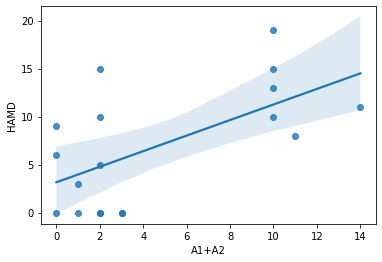

In [7]:
sns.regplot(x='A1+A2',y='HAMD', data= df)

In [8]:
# OLS:  regression for for A1+A2 and HAMD
model = sm.OLS(endog = df['HAMD'], exog=df['A1+A2'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   HAMD   R-squared (uncentered):                   0.667
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                              34.07
Date:                Thu, 15 Jul 2021   Prob (F-statistic):                    1.98e-05
Time:                        15:23:49   Log-Likelihood:                         -55.542
No. Observations:                  18   AIC:                                      113.1
Df Residuals:                      17   BIC:                                      114.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
